In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
encodings_to_try = ['utf-8-sig', 'latin-1', 'ISO-8859-1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv("C:/Users/15694/Desktop/Cross selling/code/Michelle/variable_without_pca2.csv", encoding=encoding)
        break
    except UnicodeDecodeError:
        continue

In [4]:
df.head()

,SIX_MONTH_BAL_OS_SAVINGS,SIX_MONTH_BAL_OS_CURRENT,SIX_MONTH_BAL_OS_FD,SIX_MONTH_BAL_OS_LEASING,SIX_MONTH_BAL_OS_CARD,SIX_MONTH_BAL_OS_OD,TOTAL_AVG_BAL,FD_AMOUNT_UNDER_LIEN,CURRENT_AMOUNT_UNDER_LIEN,SAVINGS_AMOUNT_UNDER_LIEN,CUSTOMER_PROFITABILITY,NO_OF_ASSERT_ACCOUNTS,NO_OF_LIABILITY_ACCOUNTS,CR_DR_Usage,NPA_FLAG,LOAN_CAT1
0,0.042612,-0.048785,-0.053259,-0.134894,-0.155864,-0.075719,-0.062581,-0.023629,-0.044929,-0.056843,-0.003142,0.397017,1.805905,0.051895,0,3
1,-0.091396,-0.048785,0.066148,-0.134894,-0.297359,-0.075719,-0.050164,-0.023629,-0.044929,-0.056843,-0.010305,-0.623858,0.600067,-0.067204,0,3
2,-0.076329,-0.048785,0.031772,-0.134894,1.262271,-0.059430,-0.065534,-0.023629,-0.044929,-0.056843,-0.006337,1.417891,1.805905,-0.023470,0,0
3,-0.101346,-0.048785,0.308069,-0.134894,-0.297359,-0.075719,-0.010893,-0.023629,-0.044929,-0.056843,0.017446,-0.623858,0.198120,-0.067204,0,3
4,-0.013879,-0.048785,-0.071656,-0.134894,-0.297359,-0.075719,-0.053618,-0.023629,-0.044929,-0.056843,-0.004448,-0.623858,-0.203826,-0.067204,1,4


In [5]:
df.columns

Index(['SIX_MONTH_BAL_OS_SAVINGS', 'SIX_MONTH_BAL_OS_CURRENT',
       'SIX_MONTH_BAL_OS_FD', 'SIX_MONTH_BAL_OS_LEASING',
       'SIX_MONTH_BAL_OS_CARD', 'SIX_MONTH_BAL_OS_OD', 'TOTAL_AVG_BAL',
       'FD_AMOUNT_UNDER_LIEN', 'CURRENT_AMOUNT_UNDER_LIEN',
       'SAVINGS_AMOUNT_UNDER_LIEN', 'CUSTOMER_PROFITABILITY',
       'NO_OF_ASSERT_ACCOUNTS', 'NO_OF_LIABILITY_ACCOUNTS', 'CR_DR_Usage',
       'NPA_FLAG', 'LOAN_CAT1'],
      dtype='object')

In [6]:
df.shape

(11836, 16)

In [7]:
df.isna().sum()

SIX_MONTH_BAL_OS_SAVINGS     0
SIX_MONTH_BAL_OS_CURRENT     0
SIX_MONTH_BAL_OS_FD          0
SIX_MONTH_BAL_OS_LEASING     0
SIX_MONTH_BAL_OS_CARD        0
SIX_MONTH_BAL_OS_OD          0
TOTAL_AVG_BAL                0
FD_AMOUNT_UNDER_LIEN         0
CURRENT_AMOUNT_UNDER_LIEN    0
SAVINGS_AMOUNT_UNDER_LIEN    0
CUSTOMER_PROFITABILITY       0
NO_OF_ASSERT_ACCOUNTS        0
NO_OF_LIABILITY_ACCOUNTS     0
CR_DR_Usage                  0
NPA_FLAG                     0
LOAN_CAT1                    0
dtype: int64

In [8]:
df1=df[["TOTAL_AVG_BAL","CUSTOMER_PROFITABILITY","SIX_MONTH_BAL_OS_FD","SIX_MONTH_BAL_OS_SAVINGS"
        ,"LOAN_CAT1"]]

In [9]:
X = df1.drop(columns=["LOAN_CAT1"])
Y = df1["LOAN_CAT1"]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score,  classification_report, confusion_matrix


In [11]:
train_set, test_set = train_test_split(df1, test_size=0.3, random_state=0)
train_df = pd.DataFrame(train_set)
test_df = pd.DataFrame(test_set)

In [12]:
df_cat_0 = train_df[train_df.LOAN_CAT1==0]
df_cat_1 = train_df[train_df.LOAN_CAT1==1]
df_cat_2 = train_df[train_df.LOAN_CAT1==2]
df_cat_3 = train_df[train_df.LOAN_CAT1==3]
df_cat_4 = train_df[train_df.LOAN_CAT1==4]
df_cat_5 = train_df[train_df.LOAN_CAT1==5]
df_cat_0.shape,df_cat_1.shape,df_cat_2.shape,df_cat_3.shape,df_cat_4.shape,df_cat_5.shape

((185, 5), (2006, 5), (1246, 5), (3221, 5), (796, 5), (831, 5))

In [13]:
##### The data set is imbalanced

In [14]:

X_train = train_df.drop(columns=["LOAN_CAT1"])
y_train = train_df["LOAN_CAT1"]
X_train.shape, y_train.shape

((8285, 4), (8285,))

In [15]:
X_test = test_df.drop(columns=["LOAN_CAT1"])
y_test = test_df["LOAN_CAT1"]
X_test.shape, y_test.shape

((3551, 4), (3551,))

In [16]:
from sklearn.utils import resample

In [17]:
df_majority = train_df[train_df["LOAN_CAT1"] == 3]
df_minority_1 = train_df[train_df["LOAN_CAT1"] == 0]
df_minority_2 = train_df[train_df["LOAN_CAT1"] == 1]
df_minority_3 = train_df[train_df["LOAN_CAT1"] == 2]
df_minority_4 = train_df[train_df["LOAN_CAT1"] == 4]
df_minority_5 = train_df[train_df["LOAN_CAT1"] == 5]
df_minority_6 = train_df[train_df["LOAN_CAT1"] == 6]

## oversampling

In [18]:
from sklearn.utils import resample
df_minority_1_upsampled = resample(df_minority_1, replace=True, n_samples=len(df_majority), random_state=42)
df_minority_2_upsampled = resample(df_minority_2, replace=True, n_samples=len(df_majority), random_state=42)
df_minority_3_upsampled = resample(df_minority_3, replace=True, n_samples=len(df_majority), random_state=42)
df_minority_4_upsampled = resample(df_minority_4, replace=True, n_samples=len(df_majority), random_state=42)
df_minority_5_upsampled = resample(df_minority_5, replace=True, n_samples=len(df_majority), random_state=42)

In [19]:
train_upsampled = pd.concat([df_majority,
                             df_minority_1_upsampled,
                             df_minority_2_upsampled,
                             df_minority_3_upsampled,
                             df_minority_4_upsampled,
                             df_minority_5_upsampled,
                             ])

In [20]:
train_upsampled["LOAN_CAT1"].value_counts()

3    3221
0    3221
1    3221
2    3221
4    3221
5    3221
Name: LOAN_CAT1, dtype: int64

In [21]:
X_up = train_upsampled.drop("LOAN_CAT1", axis=1)
Y_up = train_upsampled["LOAN_CAT1"]

X_up.shape, X_test.shape,Y_up.shape, y_test.shape

((19326, 4), (3551, 4), (19326,), (3551,))

### Tree based models

###### Decision Tree

In [22]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [23]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_up, Y_up)
y_pred_DT = decision_tree.predict(X_test)

In [24]:
acc = accuracy_score(y_test, y_pred_DT)
prec_macro = precision_score(y_test, y_pred_DT, average='macro')
recall_macro = recall_score(y_test, y_pred_DT, average='macro')
f1_macro = f1_score(y_test, y_pred_DT, average='macro')
classification_rep = classification_report(y_test, y_pred_DT)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred_DT)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy Score: 0.6054632497887918
Precision (Macro): 0.5290720492246609
Recall (Macro): 0.5217965309400422
F1 Score (Macro): 0.5247026099838267
Confusion Matrix:
[[ 20  33   9   8   2   1]
 [ 45 511 168 116   5   2]
 [  7 143 243 168   8   6]
 [  7  70 142 967  94  47]
 [  2   7  11 133 140  45]
 [  0   2   4  47  69 269]]

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.27      0.26        73
           1       0.67      0.60      0.63       847
           2       0.42      0.42      0.42       575
           3       0.67      0.73      0.70      1327
           4       0.44      0.41      0.43       338
           5       0.73      0.69      0.71       391

    accuracy                           0.61      3551
   macro avg       0.53      0.52      0.52      3551
weighted avg       0.61      0.61      0.60      3551



In [25]:

y_pred_train_DT = decision_tree.predict(X_up)

In [26]:
acc = accuracy_score(Y_up, y_pred_train_DT)
prec_macro = precision_score(Y_up, y_pred_train_DT, average='macro')
recall_macro = recall_score(Y_up, y_pred_train_DT, average='macro')
f1_macro = f1_score(Y_up, y_pred_train_DT, average='macro')
classification_rep_DT = classification_report(Y_up,y_pred_train_DT)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_DT = confusion_matrix(Y_up, y_pred_train_DT)
print("Confusion Matrix:")
print(cf_matrix_DT)
print("\nClassification Report:\n", classification_rep_DT)

Accuracy Score: 1.0
Precision (Macro): 1.0
Recall (Macro): 1.0
F1 Score (Macro): 1.0
Confusion Matrix:
[[3221    0    0    0    0    0]
 [   0 3221    0    0    0    0]
 [   0    0 3221    0    0    0]
 [   0    0    0 3221    0    0]
 [   0    0    0    0 3221    0]
 [   0    0    0    0    0 3221]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3221
           1       1.00      1.00      1.00      3221
           2       1.00      1.00      1.00      3221
           3       1.00      1.00      1.00      3221
           4       1.00      1.00      1.00      3221
           5       1.00      1.00      1.00      3221

    accuracy                           1.00     19326
   macro avg       1.00      1.00      1.00     19326
weighted avg       1.00      1.00      1.00     19326



##### pre pruning

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {
        'max_depth': range(2,50,1),
         'min_samples_split': range(1,5,1),
         'min_samples_leaf': range(2,5,1)}

In [29]:
dtree = tree.DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_up, Y_up)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
720 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", li

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(2, 50),
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(1, 5)})

In [30]:
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [31]:
best_dtree_pp = DecisionTreeClassifier(max_depth=36, min_samples_leaf=2, min_samples_split=2)
best_dtree_pp.fit(X_up, Y_up)
y_pred_pre = best_dtree_pp.predict(X_test)

In [32]:
acc = accuracy_score(y_test, y_pred_pre)
prec_macro = precision_score(y_test, y_pred_pre, average='macro')
recall_macro = recall_score(y_test, y_pred_pre, average='macro')
f1_macro = f1_score(y_test, y_pred_pre, average='macro')
classification_rep_pre = classification_report(y_test, y_pred_pre)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_pre = confusion_matrix(y_test, y_pred_pre)
print("Confusion Matrix:")
print(cf_matrix_pre)
print("\nClassification Report:\n", classification_rep_pre)

Accuracy Score: 0.6060264714165023
Precision (Macro): 0.5322879597474576
Recall (Macro): 0.5408627622519511
F1 Score (Macro): 0.5357866475076508
Confusion Matrix:
[[ 24  34   9   3   3   0]
 [ 52 524 174  89   6   2]
 [  6 158 253 142   9   7]
 [  7  91 159 920 105  45]
 [  2   7  13 112 155  49]
 [  0   1   5  33  76 276]]

Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.33      0.29        73
           1       0.64      0.62      0.63       847
           2       0.41      0.44      0.43       575
           3       0.71      0.69      0.70      1327
           4       0.44      0.46      0.45       338
           5       0.73      0.71      0.72       391

    accuracy                           0.61      3551
   macro avg       0.53      0.54      0.54      3551
weighted avg       0.61      0.61      0.61      3551



In [33]:
y_pred_pre_train = best_dtree_pp.predict(X_up)

In [34]:
acc = accuracy_score(Y_up, y_pred_pre_train )
prec_macro = precision_score(Y_up, y_pred_pre_train , average='macro')
recall_macro = recall_score(Y_up, y_pred_pre_train, average='macro')
f1_macro = f1_score(Y_up, y_pred_pre_train , average='macro')
classification_rep_pre_train = classification_report(Y_up,y_pred_pre_train)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_DT_pre = confusion_matrix(Y_up, y_pred_pre_train)
print("Confusion Matrix:")
print(cf_matrix_DT_pre)
print("\nClassification Report:\n", classification_rep_pre_train )

Accuracy Score: 0.977905412397806
Precision (Macro): 0.9781514277419578
Recall (Macro): 0.977905412397806
F1 Score (Macro): 0.9776877176357188
Confusion Matrix:
[[3221    0    0    0    0    0]
 [  11 3170   27   11    1    1]
 [   0   31 3180    7    3    0]
 [   3  104   98 2924   59   33]
 [   0    1    2   12 3200    6]
 [   0    1    0   10    6 3204]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3221
           1       0.96      0.98      0.97      3221
           2       0.96      0.99      0.97      3221
           3       0.99      0.91      0.95      3221
           4       0.98      0.99      0.99      3221
           5       0.99      0.99      0.99      3221

    accuracy                           0.98     19326
   macro avg       0.98      0.98      0.98     19326
weighted avg       0.98      0.98      0.98     19326



#### post pruning

In [35]:
decision_tree = DecisionTreeClassifier(random_state=0)

In [36]:
path = decision_tree.cost_complexity_pruning_path(X_up, Y_up)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 3.43594960e-05 3.44958433e-05 ... 4.95957424e-02
 5.49778628e-02 1.13643910e-01]


In [37]:
# For each alpha we will append our model to a list
decision_trees = []
for ccp_alpha in ccp_alphas:
    decision_tree = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    decision_tree.fit(X_up, Y_up)
    decision_trees.append(decision_tree)
print("Number of nodes in the last tree is :{} with ccp_alpha:{}".format(
decision_trees[-1].tree_.node_count,ccp_alphas[-1]))

Number of nodes in the last tree is :1 with ccp_alpha:0.11364390973475991


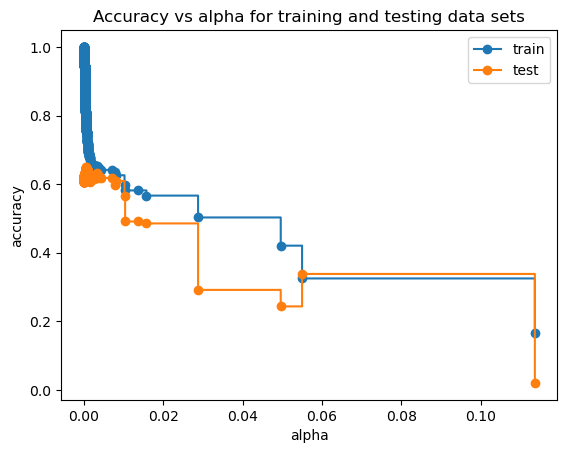

In [38]:
train_scores=[decision_tree.score(X_up, Y_up) for decision_tree in decision_trees]
test_scores=[decision_tree.score(X_test, y_test) for decision_tree in decision_trees]

fig,ax =plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing data sets")
ax.plot(ccp_alphas,train_scores,marker='o',label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker='o',label="test",drawstyle="steps-post")

ax.legend()
plt.show()

In [39]:
decision_tree = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.001)
decision_tree.fit(X_up, Y_up)
y_train_pred_po = decision_tree.predict(X_up)
y_test_pred_po = decision_tree.predict(X_test)

In [40]:
acc = accuracy_score(y_test, y_test_pred_po)
prec_macro = precision_score(y_test, y_test_pred_po, average='macro')
recall_macro = recall_score(y_test, y_test_pred_po, average='macro')
f1_macro = f1_score(y_test, y_test_pred_po, average='macro')
classification_rep_po = classification_report(y_test, y_test_pred_po)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_po= confusion_matrix(y_test, y_test_pred_po)
print("Confusion Matrix:")
print(cf_matrix_po)
print("\n Classification Report:\n", classification_rep_po)

Accuracy Score: 0.6130667417628837
Precision (Macro): 0.5665964874850865
Recall (Macro): 0.6321398620897906
F1 Score (Macro): 0.5613777158961568
Confusion Matrix:
[[ 52   9   8   2   0   2]
 [176 367 208  89   7   0]
 [ 37  96 308 116  15   3]
 [ 17  20 159 935 175  21]
 [  4   0   3  68 224  39]
 [  0   0   1  12  87 291]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.71      0.29        73
           1       0.75      0.43      0.55       847
           2       0.45      0.54      0.49       575
           3       0.77      0.70      0.73      1327
           4       0.44      0.66      0.53       338
           5       0.82      0.74      0.78       391

    accuracy                           0.61      3551
   macro avg       0.57      0.63      0.56      3551
weighted avg       0.67      0.61      0.63      3551



In [41]:
acc = accuracy_score(Y_up, y_train_pred_po )
prec_macro = precision_score(Y_up, y_train_pred_po , average='macro')
recall_macro = recall_score(Y_up, y_train_pred_po, average='macro')
f1_macro = f1_score(Y_up, y_train_pred_po , average='macro')
classification_rep_DT_po = classification_report(Y_up,y_train_pred_po )
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_po = confusion_matrix(Y_up, y_train_pred_po)
print("Confusion Matrix:")
print(cf_matrix_po)
print("\nClassification Report:\n", classification_rep_DT_po)

Accuracy Score: 0.7036634585532443
Precision (Macro): 0.7055298030093358
Recall (Macro): 0.7036634585532443
F1 Score (Macro): 0.7003019302815243
Confusion Matrix:
[[2928   75  110   73   35    0]
 [ 587 1628  706  267   24    9]
 [ 120  543 1905  543   81   29]
 [  35   56  402 2269  412   47]
 [  16    4    9  491 2319  382]
 [   0    0    4   83  584 2550]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85      3221
           1       0.71      0.51      0.59      3221
           2       0.61      0.59      0.60      3221
           3       0.61      0.70      0.65      3221
           4       0.67      0.72      0.69      3221
           5       0.85      0.79      0.82      3221

    accuracy                           0.70     19326
   macro avg       0.71      0.70      0.70     19326
weighted avg       0.71      0.70      0.70     19326



In [42]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_prob,multi_class='ovr')

NameError: name 'y_prob' is not defined